# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adamax


seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [2]:
def TestOptim(optimizer):
    # training parameters
    batch_size = 32
    epochs = 15

    # create the deep neural net
    model_DNN = compile_model(optimizer)

    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))

    # evaluate model
    score = model_DNN.evaluate(X_test, Y_test, verbose=0)

    # print performance
    print()
    print('Optimizer:'+optimizer)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # summarize history for accuracy
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.grid(True)
    plt.legend(['train', 'test'], loc='best')

    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.grid(True)
    plt.legend(['train', 'test'], loc='best')
    plt.show()

# <span style="color:red"> Exercise 12.1 </span>

# Deep Neural Networks and digit recognition

The goal of exercise 12 is to use deep neural network models (DNN), implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).

#### Step 1: Load and Process the Data

In [3]:
from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)



X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


#### Step 2: Define the Neural Net and its Architecture

In [4]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


#### Step 3: Choose the Optimizer and the Cost Function

In [5]:
def compile_model(optimizer):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


#### Step 4-5: Train the model and evaluate the Model Performance on the *Unseen* Test Data for different optimizers


Optimizer:sgd
Test loss: 0.0860925242304802
Test accuracy: 0.972000002861023


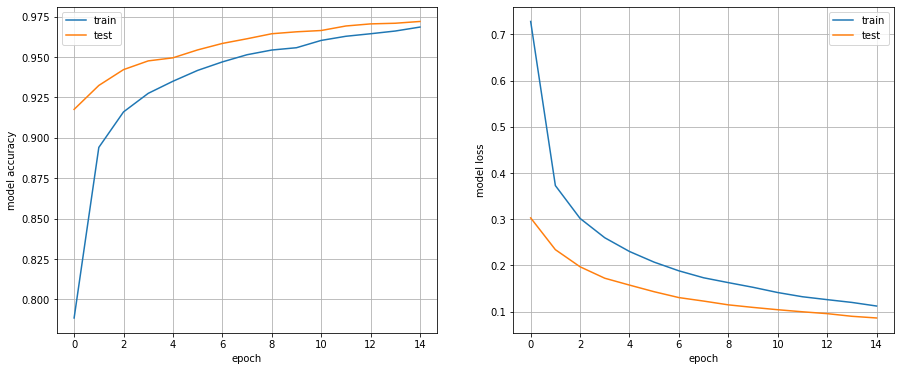

In [6]:
TestOptim('sgd')


Optimizer:RMSprop
Test loss: 0.2721884846687317
Test accuracy: 0.9700000286102295


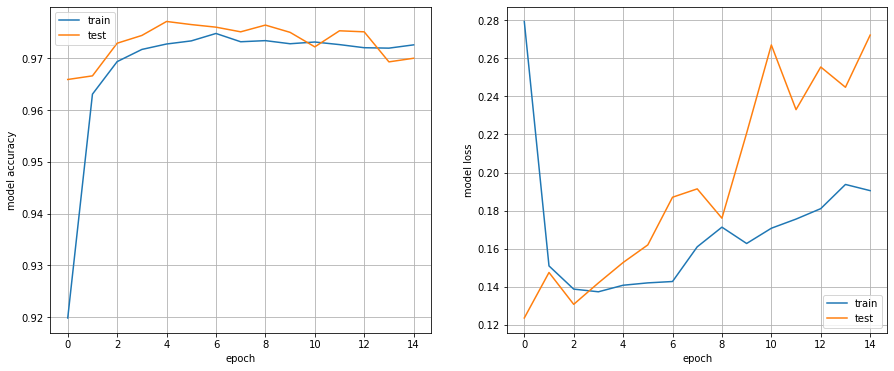

In [7]:
TestOptim('RMSprop')


Optimizer:Adam
Test loss: 0.11593083292245865
Test accuracy: 0.9814000129699707


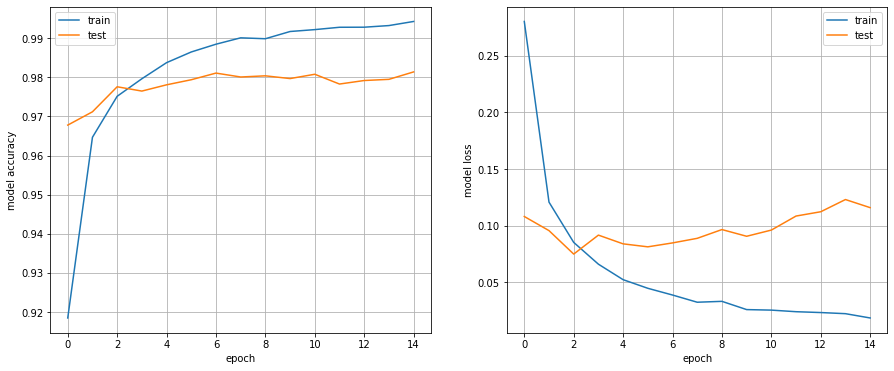

In [8]:
TestOptim('Adam')

As we can see all the tested optimizers have a good ending acceptance $($over $97 \%)$ over a quite long (15 training epochs) training period. 

The *'sgd'* one has the smoothest shape both for loss and for accuracy and goes to a very low $(0.086)$ value for the loss function.
The *'Adam'* one too has a good final loss value $(0.098)$ but there is an increase of the test loss funtion which crosses the train function.
The *'RDSprop'* is the worst, with higher oscillations and the highest final loss value $(0.288)$, obtained by an increasing of the train loss function after the 4th epoch.

# <span style="color:red"> Exercise 12.2 </span>

# Convolutional Neural Networks and digit recognition

For this exercise I changed the architecture of my DNN using convolutional layers. 

The convolutional networks are translationally incariant NN that respect the locality of input data. For MNIST data set this means that we can be moore accurate with the training, considering also the pixels correlations which make up the digits.

Since we have seen in the lesson that tipically, in a CNN, the convolution and max-pool layers are generally followed by an all-to-all connected layer and a classifier such as a soft-max, I decided to structure my CNN as follows:

( Input image size = 28x28x1 )

1st Layer : 
- convolution operation with 6 filters 5x5 (-> output = 24x24x6 )
- pooling with 2x2 filter (-> output = 12x12x6 )

2nd Layer : 
- convolution operation with 16 filters 5x5 (-> output = 8x8x16 )
- pooling with 2x2 filter (-> output = 4x4x16 )

Than we have to unroll (flatten) the provious params (-> output = 5x5x16 = 400)

At the end the data passes through 2 Dense layers of size 256 to convert the image matrix into a classification matrix. The first layer with a 'relu' activation function and the second one with a 'softmax' which bind the probability to each digit (and so has size 10).

In [9]:
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [10]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first layer
    model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    #add second layer
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #add flatten
    model.add(Flatten())
    #add last but one layer          
    model.add(Dense(256, activation='relu'))
    #add last softmax layer
    model.add(Dense(10, activation='softmax'))
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])
    return model

In [11]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.6453 - accuracy: 0.7886 - val_loss: 0.2608 - val_accuracy: 0.9525
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2903 - accuracy: 0.9086 - val_loss: 0.1769 - val_accuracy: 0.9596
Epoch 3/5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.2263 - accuracy: 0.9274 - val_loss: 0.1383 - val_accuracy: 0.9693
Epoch 4/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1948 - accuracy: 0.9382 - val_loss: 0.1091 - val_accuracy: 0.9751
Epoch 5/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1719 - accuracy: 0.9452 - val_loss: 0.1055 - val_accuracy: 0.9799

Test loss: 0.10549648106098175
Test accuracy: 0.9799000024795532


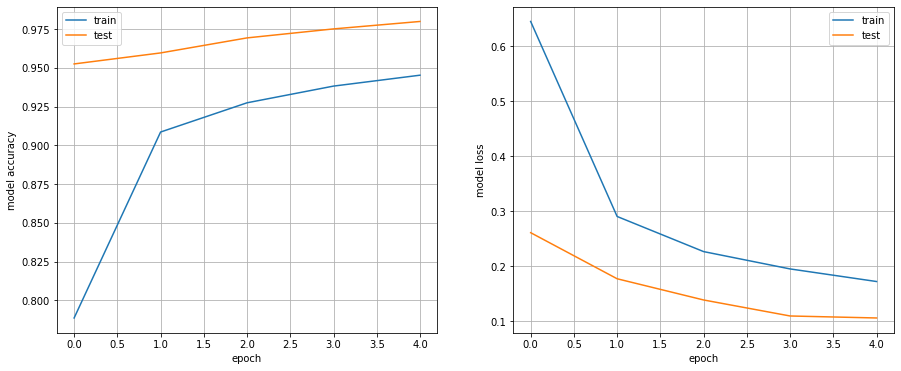

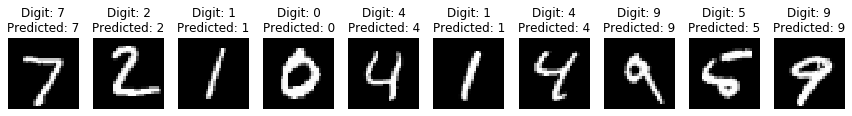

In [12]:
# summarize history for accuracy
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='best')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.grid(True)
plt.legend(['train', 'test'], loc='best')
plt.show()

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

As we can see, the CNN set with the described configuration has a good recognition ability.

# <span style="color:red"> Exercise 12.3 </span>

# Let's test with my digits

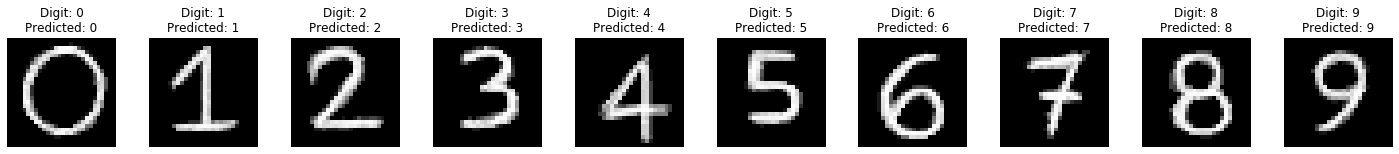

In [21]:
from PIL import Image
import os

plt.figure(figsize=(25,2))

for digit in range(10):

    digit_filename = "../Es12/Digits/"+str(digit)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

    plt.subplot(1, 10, digit+1)
    
    plt.imshow(data, cmap='gray')
    
    data = data.reshape(1, xdim*ydim)
    
    # reshape data, depending on Keras backend
    if keras.backend.image_data_format() == 'channels_first':
        data = data.reshape(data.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        data = data.reshape(data.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        
    pred_0 = model_CNN.predict(data)
    
    plt.title("Digit: {}\nPredicted: {}".format(digit, np.argmax(pred_0)))
    plt.axis('off')
plt.show()

The CNN recognized all digits written by me like above. I found that that for digits which have different ways to be written (like 4) the network has difficulties to recognize them all the times.

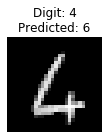

In [14]:
plt.figure(figsize=(20,2))

digit_filename = "../Es12/Digits/4worst.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.subplot(1, 10, digit+1)

plt.imshow(data, cmap='gray')

data = data.reshape(1, xdim*ydim)

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

pred_0 = model_CNN.predict(data)

plt.title("Digit: {}\nPredicted: {}".format(4, np.argmax(pred_0)))
plt.axis('off')
plt.show()